In [1]:
import numpy as np
import xarray as xr
import pandas as pd
from salishsea_tools import viz_tools, places, visualisations
from matplotlib import pyplot as plt, dates
from datetime import datetime, timedelta
from calendar import month_name
from scipy.io import loadmat
from tqdm.notebook import tqdm
from salishsea_tools import nc_tools
from dask.diagnostics import ProgressBar
import cmocean

%matplotlib inline

In [2]:
plt.rcParams.update({'font.size': 12, 'axes.titlesize': 'medium'})

### Load files from monthly averages

In [3]:
# Load monthly averages
mask = xr.open_dataset('/data/eolson/results/MEOPAR/NEMO-forcing-new/grid/mesh_mask201702.nc')
slc = {'y': slice(250,450), 'x': slice(50,200)} 
e3t, tmask = [mask[var].isel(z=slice(None, 20),**slc).values for var in ('e3t_0', 'tmask')]
years, variables = range(2007, 2021), ['nitrate']


# Temporary list dict
data = {}

# Permanent aggregate dict
aggregates = {var: {} for var in variables}

# Loop through years
for year in [2007,2008,2009,2010,2011,2012,2016,2017,2018,2019,2020]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(1, 13):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/v201905r/SalishSea_1m_{datestr}_{datestr}'
        
        
        # Load grazing variables
        with xr.open_dataset(prefix + '_ptrc_T.nc') as ds:
            for var in ['nitrate']:
                data[var].append(np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 20), **slc).values * e3t).sum(axis=1).data)
    
    # Concatenate months
    for var in variables: aggregates[var][year] = np.concatenate(data[var]).mean(axis=0)
        
        
# Loop through years for wrap files
for year in [2013,2014,2015]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(1, 13):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/v201905r_wrap/SalishSea_1m_{datestr}_{datestr}'
        
        # Load grazing variables
        with xr.open_dataset(prefix + '_ptrc_T.nc') as ds:
            for var in ['nitrate']:
                data[var].append(np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 20), **slc).values * e3t).sum(axis=1).data)
    
    # Concatenate months
    for var in variables: aggregates[var][year] = np.concatenate(data[var]).mean(axis=0)
   
# Calculate climatological mean and anomalies
for var in variables:
    aggregates[var]['mean'] = np.concatenate([aggregates[var][year][None, ...] for year in years]).mean(axis=0)
    for year in years: aggregates[var][year] = aggregates[var][year] - aggregates[var]['mean']

In [4]:
print(np.shape(aggregates['nitrate'][2015][:]))

(200, 150)


In [5]:
# Reset variables for plotting
tmask = tmask[0, 0, ...]
variables = ['nitrate']

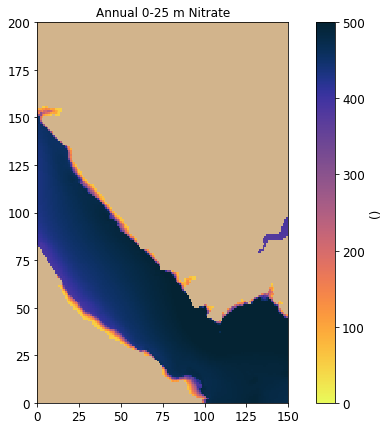

In [6]:
##### with pcolormesh: no smoothing
cmap0=cmocean.cm.balance
cmap0.set_bad('tan')
vmin=0
vmax=500
cmap1=cmocean.cm.thermal_r
cmap1.set_bad('tan')
il=0

fig,ax=plt.subplots(1,1,figsize=(10,7))
#fig.suptitle('Annual Anomalies Mesozoop Feeding on Diatoms', fontsize=16)
m0=ax.pcolormesh(np.ma.masked_where(tmask==0,((aggregates['nitrate']['mean']))),cmap=cmap1,vmin=vmin,vmax=vmax)
viz_tools.set_aspect(ax,coords='grid')
ax.set_title('Annual 0-25 m Nitrate')
fig.colorbar(m0,ax=ax,label='()')




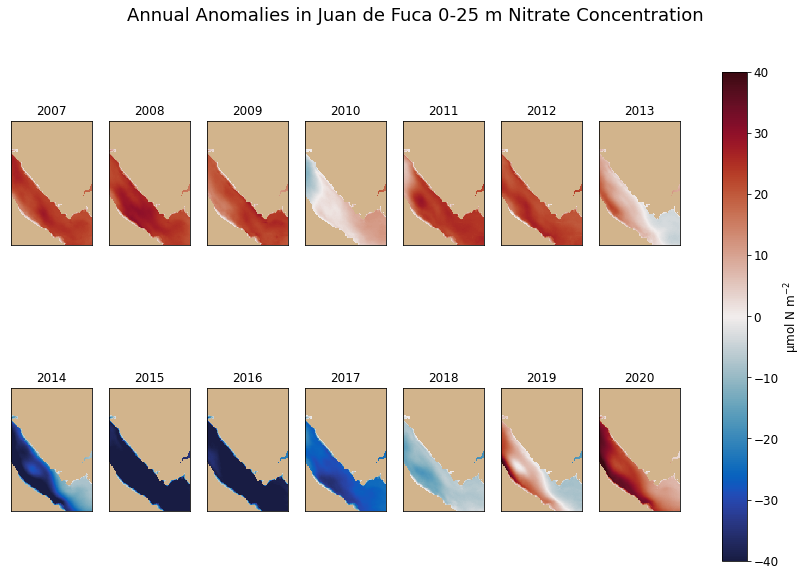

In [7]:
##### with pcolormesh: no smoothing
cmap0=cmocean.cm.balance
cmap0.set_bad('tan')

#cmap1=cmocean.cm.haline
#cmap1.set_bad('k')
il=0
vmin=-40
vmax=40

fig,ax=plt.subplots(2,7,figsize=(15,9))
fig.suptitle('Annual Anomalies in Juan de Fuca 0-25 m Nitrate Concentration', fontsize=18)


m0=ax[0,0].pcolormesh(np.ma.masked_where(tmask==0,((aggregates['nitrate'][2007]))),cmap=cmap0,vmin=vmin,vmax=vmax)
viz_tools.set_aspect(ax[0,0],coords='grid')
ax[0,0].set_title('2007')
ax[0,0].yaxis.set_visible(False)
ax[0,0].xaxis.set_visible(False)
ax[0,0].yaxis.set_visible(False)
#fig.colorbar(m0,ax=ax[1])

m0=ax[0,1].pcolormesh(np.ma.masked_where(tmask==0,((aggregates['nitrate'][2008]))),cmap=cmap0,vmin=vmin,vmax=vmax)
viz_tools.set_aspect(ax[0,1],coords='grid')
ax[0,1].set_title('2008')
ax[0,1].yaxis.set_visible(False)
ax[0,1].xaxis.set_visible(False)
ax[0,1].yaxis.set_visible(False)
#fig.colorbar(m0,ax=ax[2])

m0=ax[0,2].pcolormesh(np.ma.masked_where(tmask==0,((aggregates['nitrate'][2009]))),cmap=cmap0,vmin=vmin,vmax=vmax)
viz_tools.set_aspect(ax[0,2],coords='grid')
ax[0,2].set_title('2009')
ax[0,2].yaxis.set_visible(False)
ax[0,2].xaxis.set_visible(False)
ax[0,2].yaxis.set_visible(False)
#fig.colorbar(m0,ax=ax[3])

m0=ax[0,3].pcolormesh(np.ma.masked_where(tmask==0,((aggregates['nitrate'][2010]))),cmap=cmap0,vmin=vmin,vmax=vmax)
viz_tools.set_aspect(ax[0,3],coords='grid')
ax[0,3].set_title('2010')
ax[0,3].yaxis.set_visible(False)
ax[0,3].xaxis.set_visible(False)
ax[0,3].yaxis.set_visible(False)
#fig.colorbar(m0,ax=ax[4])

m0=ax[0,4].pcolormesh(np.ma.masked_where(tmask==0,((aggregates['nitrate'][2011]))),cmap=cmap0,vmin=vmin,vmax=vmax)
viz_tools.set_aspect(ax[0,4],coords='grid')
ax[0,4].set_title('2011')
ax[0,4].yaxis.set_visible(False)
ax[0,4].xaxis.set_visible(False)
ax[0,4].yaxis.set_visible(False)

m0=ax[0,5].pcolormesh(np.ma.masked_where(tmask==0,((aggregates['nitrate'][2012]))),cmap=cmap0,vmin=vmin,vmax=vmax)
viz_tools.set_aspect(ax[0,5],coords='grid')
ax[0,5].set_title('2012')
ax[0,5].yaxis.set_visible(False)
ax[0,5].xaxis.set_visible(False)
ax[0,5].yaxis.set_visible(False)

m0=ax[0,6].pcolormesh(np.ma.masked_where(tmask==0,((aggregates['nitrate'][2013]))),cmap=cmap0,vmin=vmin,vmax=vmax)
viz_tools.set_aspect(ax[0,6],coords='grid')
ax[0,6].set_title('2013')
ax[0,6].yaxis.set_visible(False)
ax[0,6].xaxis.set_visible(False)
ax[0,6].yaxis.set_visible(False)

m0=ax[1,0].pcolormesh(np.ma.masked_where(tmask==0,((aggregates['nitrate'][2014]))),cmap=cmap0,vmin=vmin,vmax=vmax)
viz_tools.set_aspect(ax[1,0],coords='grid')
ax[1,0].set_title('2014')
ax[1,0].yaxis.set_visible(False)
ax[1,0].xaxis.set_visible(False)
ax[1,0].yaxis.set_visible(False)

m0=ax[1,1].pcolormesh(np.ma.masked_where(tmask==0,((aggregates['nitrate'][2015]))),cmap=cmap0,vmin=vmin,vmax=vmax)
viz_tools.set_aspect(ax[1,1],coords='grid')
ax[1,1].set_title('2015')
ax[1,1].yaxis.set_visible(False)
ax[1,1].xaxis.set_visible(False)
ax[1,1].yaxis.set_visible(False)

m0=ax[1,2].pcolormesh(np.ma.masked_where(tmask==0,((aggregates['nitrate'][2016]))),cmap=cmap0,vmin=vmin,vmax=vmax)
viz_tools.set_aspect(ax[1,2],coords='grid')
ax[1,2].set_title('2016')
ax[1,2].yaxis.set_visible(False)
ax[1,2].xaxis.set_visible(False)
ax[1,2].yaxis.set_visible(False)

m0=ax[1,3].pcolormesh(np.ma.masked_where(tmask==0,((aggregates['nitrate'][2017]))),cmap=cmap0,vmin=vmin,vmax=vmax)
viz_tools.set_aspect(ax[1,3],coords='grid')
ax[1,3].set_title('2017')
ax[1,3].yaxis.set_visible(False)
ax[1,3].xaxis.set_visible(False)
ax[1,3].yaxis.set_visible(False)

m0=ax[1,4].pcolormesh(np.ma.masked_where(tmask==0,((aggregates['nitrate'][2018]))),cmap=cmap0,vmin=vmin,vmax=vmax)
viz_tools.set_aspect(ax[1,4],coords='grid')
ax[1,4].set_title('2018')
ax[1,4].yaxis.set_visible(False)
ax[1,4].xaxis.set_visible(False)
ax[1,4].yaxis.set_visible(False)

m0=ax[1,5].pcolormesh(np.ma.masked_where(tmask==0,((aggregates['nitrate'][2019]))),cmap=cmap0,vmin=vmin,vmax=vmax)
viz_tools.set_aspect(ax[1,5],coords='grid')
ax[1,5].set_title('2019')
ax[1,5].yaxis.set_visible(False)
ax[1,5].xaxis.set_visible(False)
ax[1,5].yaxis.set_visible(False)

m0=ax[1,6].pcolormesh(np.ma.masked_where(tmask==0,((aggregates['nitrate'][2020]))),cmap=cmap0,vmin=vmin,vmax=vmax)
viz_tools.set_aspect(ax[1,6],coords='grid')
ax[1,6].set_title('2020')
ax[1,6].yaxis.set_visible(False)
ax[1,6].xaxis.set_visible(False)
ax[1,6].yaxis.set_visible(False)

fig.colorbar(m0,ax=ax,label='\u03bcmol N m$^{-2}$')



### Plot Seasonal Cycles for Individual Years

In [8]:

#years, months, data
monthly_array_nitrate_depthint_slice = np.zeros([14,12,200,150])
# Load monthly averages
mask = xr.open_dataset('/data/eolson/results/MEOPAR/NEMO-forcing-new/grid/mesh_mask201702.nc')
slc = {'y': slice(250,450), 'x': slice(50,200)}
e3t, tmask = [mask[var].isel(z=slice(None, 20),**slc).values for var in ('e3t_0', 'tmask')]
years, variables = range(2007, 2021), ['nitrate']
# Temporary list dict
data = {}
# Permanent aggregate dict
aggregates = {var: {} for var in variables}
monthlydat = {var: {} for var in variables}

# Loop through years
for year in [2007,2008,2009,2010,2011,2012,2016,2017,2018,2019,2020]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(1, 13):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/v201905r/SalishSea_1m_{datestr}_{datestr}'
        
        # Load grazing variables
        with xr.open_dataset(prefix + '_ptrc_T.nc') as ds:
            q = np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 20), **slc).values * e3t).sum(axis=1).data
            q2 = q[0,:,:]
            monthly_array_nitrate_depthint_slice[year-2007,month-1,:,:] = q2 #year2015 is index 0 along 1st dimension
            for var in ['nitrate']:
                data[var].append(np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 20), **slc).values * e3t).sum(axis=1).data)
    
    # Concatenate months
    for var in variables: aggregates[var][year] = np.concatenate(data[var]).mean(axis=0)

# Loop through years for wrap files
for year in [2013,2014,2015]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(1, 13):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/v201905r_wrap/SalishSea_1m_{datestr}_{datestr}'
        
        # Load grazing variables
        with xr.open_dataset(prefix + '_ptrc_T.nc') as ds:
            q = np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 20), **slc).values * e3t).sum(axis=1).data
            q2 = q[0,:,:]
            monthly_array_nitrate_depthint_slice[year-2007,month-1,:,:] = q2 #year2015 is index 0 along 1st dimension
            for var in ['nitrate']:
                data[var].append(np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 20), **slc).values * e3t).sum(axis=1).data)
    
    # Concatenate months
    for var in variables: aggregates[var][year] = np.concatenate(data[var]).mean(axis=0)

# # Calculate 5 year mean and anomalies
# for var in variables:
#     aggregates[var][‘mean’] = np.concatenate([aggregates[var][year][None, ...] for year in years]).mean(axis=0)
#     for year in years: aggregates[var][year] = aggregates[var][year] - aggregates[var][‘mean’]



(14, 12)


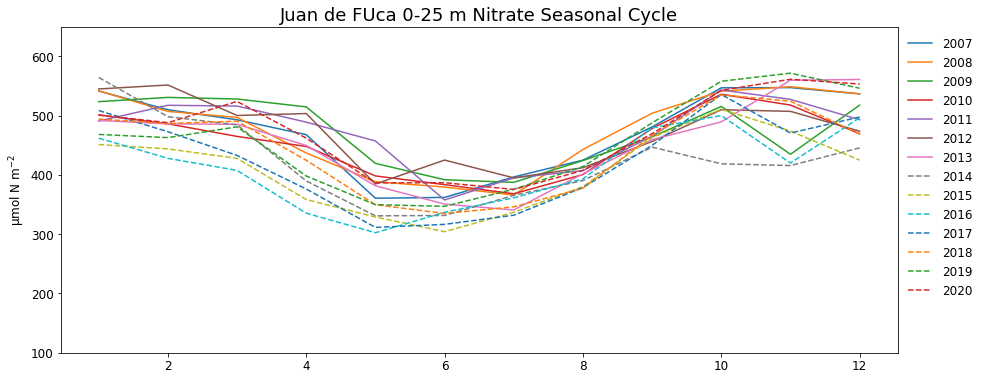

In [9]:
monthly_array_nitrate_depthint_slice[monthly_array_nitrate_depthint_slice == 0 ] = np.nan
monthly_array_nitrate_depthint_slicemean = \
np.nanmean(np.nanmean(monthly_array_nitrate_depthint_slice, axis = 2),axis = 2)
print(np.shape(monthly_array_nitrate_depthint_slicemean))


#plot monthly means for 5 years
fig, ax = plt.subplots(figsize=(15, 6))
bbox = {'boxstyle': 'round', 'facecolor': 'w', 'alpha': 0.9}
cmap = plt.get_cmap('tab10')
palette = [cmap(0), cmap(0.2), 'k', cmap(0.1), cmap(0.3)]


for i in range(0,7):
    ax.plot(np.arange(1,13), monthly_array_nitrate_depthint_slicemean[i,:],label=2007+i)
    ax.set_title('Juan de Fuca Nitrate Seasonal Cycle',fontsize=18)
    ax.legend(frameon=False)
    ax.set_ylim(0,500)
    ax.set_ylabel('\u03bcmol N')
   
for i in range(7,14):
    ax.plot(np.arange(1,13), monthly_array_nitrate_depthint_slicemean[i,:],linestyle='--',label=2007+i)
    ax.set_title('Juan de FUca 0-25 m Nitrate Seasonal Cycle',fontsize=18)
    ax.legend(frameon=False,bbox_to_anchor=(1, 1))
    ax.set_ylim(100,650)
    ax.set_ylabel('\u03bcmol N m$^{-2}$')

Text(0, 0.5, 'mmol N m$^{-2}$')

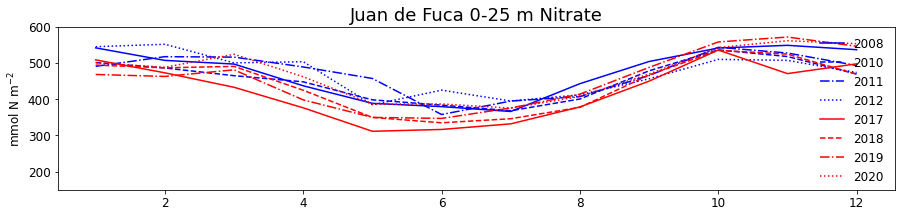

In [10]:
fig, ax = plt.subplots(figsize=(15, 3))
bbox = {'boxstyle': 'round', 'facecolor': 'w', 'alpha': 0.9}
cmap = plt.get_cmap('tab10')
palette = [cmap(0), cmap(0.2), 'k', cmap(0.1), cmap(0.3)]


ax.plot(np.arange(1,13), monthly_array_nitrate_depthint_slicemean[1,:],color='b',linestyle='-',label='2008')
ax.plot(np.arange(1,13), monthly_array_nitrate_depthint_slicemean[3,:],color='b',linestyle='--',label='2010')
ax.plot(np.arange(1,13), monthly_array_nitrate_depthint_slicemean[4,:],color='b',linestyle='-.',label='2011')
ax.plot(np.arange(1,13), monthly_array_nitrate_depthint_slicemean[5,:],color='b',linestyle=':',label='2012')
ax.plot(np.arange(1,13), monthly_array_nitrate_depthint_slicemean[10,:],color='r',linestyle='-',label='2017')
ax.plot(np.arange(1,13), monthly_array_nitrate_depthint_slicemean[11,:],color='r',linestyle='--',label='2018')
ax.plot(np.arange(1,13), monthly_array_nitrate_depthint_slicemean[12,:],color='r',linestyle='-.',label='2019')
ax.plot(np.arange(1,13), monthly_array_nitrate_depthint_slicemean[13,:],color='r',linestyle=':',label='2020')

ax.set_title('Juan de Fuca 0-25 m Nitrate',fontsize=18)
ax.legend(frameon=False)
ax.set_ylim(150,600)
ax.set_ylabel('mmol N m$^{-2}$')

In [11]:
monthly_array_nitrate_depthint_slicemean[i,5]

386.7951487237349

### Assign years to either NPGO+ or NPGO-

In [12]:
NPGOpositive=(((monthly_array_nitrate_depthint_slicemean[0,:]+monthly_array_nitrate_depthint_slicemean[1,:]+\
        monthly_array_nitrate_depthint_slicemean[2,:]+monthly_array_nitrate_depthint_slicemean[3,:]+\
        monthly_array_nitrate_depthint_slicemean[4,:]+monthly_array_nitrate_depthint_slicemean[5,:]+\
        monthly_array_nitrate_depthint_slicemean[6,:])/7))

In [13]:
monthly_array_nitrate_depthint_slicemean[5,:]

array([544.90949524, 551.59410653, 500.16829882, 503.47183465,
       384.58459701, 424.99168705, 394.96261497, 412.06579704,
       456.33932546, 509.89995641, 507.1374822 , 473.71802336])

In [14]:
NPGOpositive

array([519.28550662, 512.68153217, 497.76159815, 472.788917  ,
       398.61565506, 378.63299271, 378.40872758, 416.23108376,
       472.62929644, 526.00463422, 520.36983721, 512.54415724])

In [15]:
NPGOnegative=(((monthly_array_nitrate_depthint_slicemean[7,:]+monthly_array_nitrate_depthint_slicemean[8,:]+\
        monthly_array_nitrate_depthint_slicemean[9,:]+monthly_array_nitrate_depthint_slicemean[10,:]+\
        monthly_array_nitrate_depthint_slicemean[11,:]+monthly_array_nitrate_depthint_slicemean[12,:]+\
        monthly_array_nitrate_depthint_slicemean[13,:])/7))

In [16]:
NPGOnegative

array([492.75801409, 468.61412462, 464.0195198 , 392.08786923,
       337.13305433, 336.84414782, 356.16457998, 391.64331612,
       466.16676701, 514.34052939, 491.06658509, 490.36619036])

In [17]:
NPGOpositive.mean()

467.1628281793713

In [18]:
NPGOnegative.mean()

433.433724821383

Text(0, 0.5, 'μmol N m$^{-2}$')

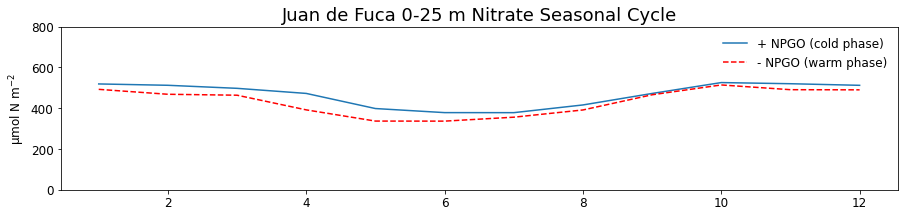

In [19]:
fig, ax = plt.subplots(figsize=(15, 3))
bbox = {'boxstyle': 'round', 'facecolor': 'w', 'alpha': 0.9}
cmap = plt.get_cmap('tab10')
palette = [cmap(0), cmap(0.2), 'k', cmap(0.1), cmap(0.3)]


ax.plot(np.arange(1,13), NPGOpositive,label='+ NPGO (cold phase)')
ax.plot(np.arange(1,13), NPGOnegative,linestyle='--',label='- NPGO (warm phase)',color='r')
ax.set_title('Juan de Fuca 0-25 m Nitrate Seasonal Cycle',fontsize=18)
ax.legend(frameon=False)
ax.set_ylim(0,800)
ax.set_ylabel('\u03bcmol N m$^{-2}$')
   

In [20]:
Random1=(((monthly_array_nitrate_depthint_slicemean[0,:]+monthly_array_nitrate_depthint_slicemean[2,:]+\
        monthly_array_nitrate_depthint_slicemean[4,:]+monthly_array_nitrate_depthint_slicemean[6,:]+\
        monthly_array_nitrate_depthint_slicemean[8,:]+monthly_array_nitrate_depthint_slicemean[10,:]+\
        monthly_array_nitrate_depthint_slicemean[12,:])/7))

In [21]:
Random2=(((monthly_array_nitrate_depthint_slicemean[1,:]+monthly_array_nitrate_depthint_slicemean[3,:]+\
        monthly_array_nitrate_depthint_slicemean[5,:]+monthly_array_nitrate_depthint_slicemean[7,:]+\
        monthly_array_nitrate_depthint_slicemean[9,:]+monthly_array_nitrate_depthint_slicemean[11,:]+\
        monthly_array_nitrate_depthint_slicemean[13,:])/7))

Text(0, 0.5, 'μmol N m$^{-2}$')

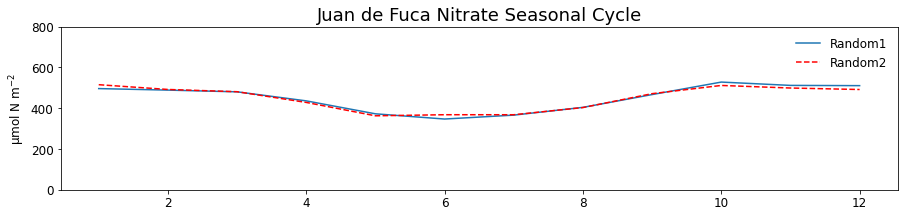

In [22]:
fig, ax = plt.subplots(figsize=(15, 3))
bbox = {'boxstyle': 'round', 'facecolor': 'w', 'alpha': 0.9}
cmap = plt.get_cmap('tab10')
palette = [cmap(0), cmap(0.2), 'k', cmap(0.1), cmap(0.3)]


ax.plot(np.arange(1,13), Random1,label='Random1')
ax.plot(np.arange(1,13), Random2,linestyle='--',label='Random2',color='r')
ax.set_title('Juan de Fuca Nitrate Seasonal Cycle',fontsize=18)
ax.legend(frameon=False)
ax.set_ylim(0,800)
ax.set_ylabel('\u03bcmol N m$^{-2}$')

### Select 4 warmest and 4 coldest years; leave NPGO "neutral" years out

In [23]:
#2008, 2010, 2011, 2012
NPGO_C=(((+monthly_array_nitrate_depthint_slicemean[1,:]+\
        monthly_array_nitrate_depthint_slicemean[3,:]+\
        monthly_array_nitrate_depthint_slicemean[4,:]+monthly_array_nitrate_depthint_slicemean[5,:])/4))

In [24]:
#2017, 2018, 2019, 2020
NPGO_W=(((monthly_array_nitrate_depthint_slicemean[10,:]+\
        monthly_array_nitrate_depthint_slicemean[11,:]+monthly_array_nitrate_depthint_slicemean[12,:]+\
        monthly_array_nitrate_depthint_slicemean[13,:])/4))

Text(0, 0.5, 'mmol N m$^{-2}$')

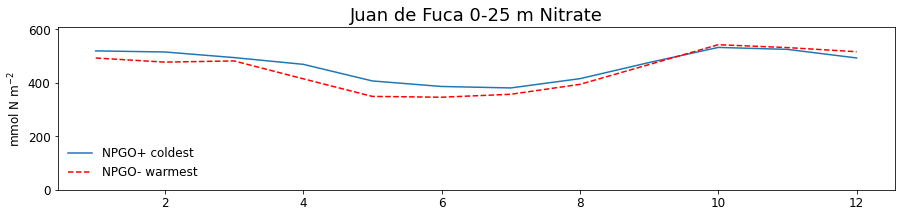

In [25]:
fig, ax = plt.subplots(figsize=(15, 3))
bbox = {'boxstyle': 'round', 'facecolor': 'w', 'alpha': 0.9}
cmap = plt.get_cmap('tab10')
palette = [cmap(0), cmap(0.2), 'k', cmap(0.1), cmap(0.3)]


ax.plot(np.arange(1,13), NPGO_C,label='NPGO+ coldest')
ax.plot(np.arange(1,13), NPGO_W,linestyle='--',label='NPGO- warmest',color='r')
ax.set_title('Juan de Fuca 0-25 m Nitrate',fontsize=18)
ax.legend(frameon=False)
ax.set_ylim(0,610)
ax.set_ylabel('mmol N m$^{-2}$')

#### Nitrate Drawdown - difference in Nitrate between January and July

In [26]:
#2008, 2010, 2011, 2012 - Difference in Nitrate between January and July
NPGO_C_drawdown=((((monthly_array_nitrate_depthint_slicemean[0,1]-monthly_array_nitrate_depthint_slicemean[0,6])+\
        (monthly_array_nitrate_depthint_slicemean[3,1]-monthly_array_nitrate_depthint_slicemean[3,6])+\
        (monthly_array_nitrate_depthint_slicemean[4,1]-monthly_array_nitrate_depthint_slicemean[4,6])+(monthly_array_nitrate_depthint_slicemean[5,1]-monthly_array_nitrate_depthint_slicemean[5,6]))/4))

In [27]:
#2017, 2018, 2019, 2020 - Difference in Nitrate between January and July
NPGO_W_drawdown=((((monthly_array_nitrate_depthint_slicemean[10,1]-monthly_array_nitrate_depthint_slicemean[10,6])+\
        (monthly_array_nitrate_depthint_slicemean[11,1]-monthly_array_nitrate_depthint_slicemean[11,6])+(monthly_array_nitrate_depthint_slicemean[12,1]-monthly_array_nitrate_depthint_slicemean[12,6])+\
        (monthly_array_nitrate_depthint_slicemean[13,1]-monthly_array_nitrate_depthint_slicemean[13,6]))/4))

In [28]:
NPGO_C_drawdown

127.60554156625827

In [29]:
NPGO_W_drawdown

120.2542135900199

In [30]:
DD2007=(monthly_array_nitrate_depthint_slicemean[0,1]-monthly_array_nitrate_depthint_slicemean[0,6])
DD2008=(monthly_array_nitrate_depthint_slicemean[1,1]-monthly_array_nitrate_depthint_slicemean[1,6])
DD2009=(monthly_array_nitrate_depthint_slicemean[2,1]-monthly_array_nitrate_depthint_slicemean[2,6])
DD2010=(monthly_array_nitrate_depthint_slicemean[3,1]-monthly_array_nitrate_depthint_slicemean[3,6])
DD2011=(monthly_array_nitrate_depthint_slicemean[4,1]-monthly_array_nitrate_depthint_slicemean[4,6])
DD2012=(monthly_array_nitrate_depthint_slicemean[5,1]-monthly_array_nitrate_depthint_slicemean[5,6])
DD2013=(monthly_array_nitrate_depthint_slicemean[6,1]-monthly_array_nitrate_depthint_slicemean[6,6])
DD2014=(monthly_array_nitrate_depthint_slicemean[7,1]-monthly_array_nitrate_depthint_slicemean[7,6])
DD2015=(monthly_array_nitrate_depthint_slicemean[8,1]-monthly_array_nitrate_depthint_slicemean[8,6])
DD2016=(monthly_array_nitrate_depthint_slicemean[9,1]-monthly_array_nitrate_depthint_slicemean[9,6])
DD2017=(monthly_array_nitrate_depthint_slicemean[10,1]-monthly_array_nitrate_depthint_slicemean[10,6])
DD2018=(monthly_array_nitrate_depthint_slicemean[11,1]-monthly_array_nitrate_depthint_slicemean[11,6])
DD2019=(monthly_array_nitrate_depthint_slicemean[12,1]-monthly_array_nitrate_depthint_slicemean[12,6])
DD2020=(monthly_array_nitrate_depthint_slicemean[13,1]-monthly_array_nitrate_depthint_slicemean[13,6])

In [31]:
print(f'2007 {DD2007:.2f}')
print(f'2008 {DD2008:.2f}')
print(f'2009 {DD2009:.2f}')
print(f'2010 {DD2010:.2f}')
print(f'2011 {DD2011:.2f}')
print(f'2012 {DD2012:.2f}')
print(f'2013 {DD2013:.2f}')
print(f'2014 {DD2014:.2f}')
print(f'2015 {DD2015:.2f}')
print(f'2016 {DD2016:.2f}')
print(f'2017 {DD2017:.2f}')
print(f'2018 {DD2018:.2f}')
print(f'2019 {DD2019:.2f}')
print(f'2020 {DD2020:.2f}')

2007 113.34
2008 140.97
2009 143.29
2010 117.99
2011 122.46
2012 156.63
2013 145.22
2014 132.69
2015 106.85
2016 66.59
2017 140.81
2018 140.51
2019 87.12
2020 112.59


Text(0, 0.5, 'μmol N m$^{-2}$')

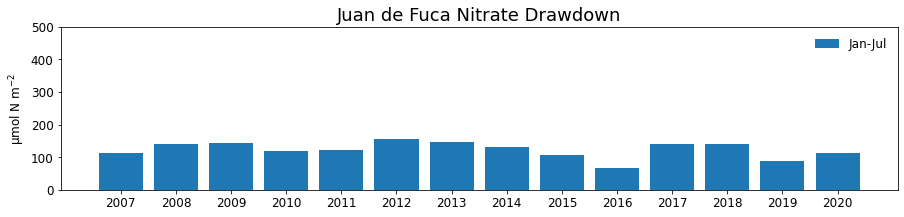

In [32]:
fig, ax = plt.subplots(figsize=(15, 3))
bbox = {'boxstyle': 'round', 'facecolor': 'w', 'alpha': 0.9}
cmap = plt.get_cmap('tab10')
palette = [cmap(0), cmap(0.2), 'k', cmap(0.1), cmap(0.3)]

x=['2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020']
y=[DD2007,DD2008,DD2009,DD2010,DD2011,DD2012,DD2013,DD2014,DD2015,DD2016,DD2017,DD2018,DD2019,DD2020]

ax.bar(x, y,label='Jan-Jul')

ax.set_title('Juan de Fuca Nitrate Drawdown',fontsize=18)
ax.legend(frameon=False)
ax.set_ylim(0,500)
ax.set_ylabel('\u03bcmol N m$^{-2}$')

### Check Marine Heat Wave years

In [33]:
NoMHW=(((monthly_array_nitrate_depthint_slicemean[0,:]+monthly_array_nitrate_depthint_slicemean[1,:]+\
        monthly_array_nitrate_depthint_slicemean[2,:]+monthly_array_nitrate_depthint_slicemean[3,:]+\
        monthly_array_nitrate_depthint_slicemean[4,:]+monthly_array_nitrate_depthint_slicemean[5,:]+\
        monthly_array_nitrate_depthint_slicemean[6,:]+monthly_array_nitrate_depthint_slicemean[7,:]+monthly_array_nitrate_depthint_slicemean[10,:]+\
        monthly_array_nitrate_depthint_slicemean[11,:]+monthly_array_nitrate_depthint_slicemean[12,:]+\
        monthly_array_nitrate_depthint_slicemean[13,:])/12))

In [34]:
MHW=(((monthly_array_nitrate_depthint_slicemean[8,:]+monthly_array_nitrate_depthint_slicemean[9,:])/2))

Text(0, 0.5, 'μmol N m$^{-2}$')

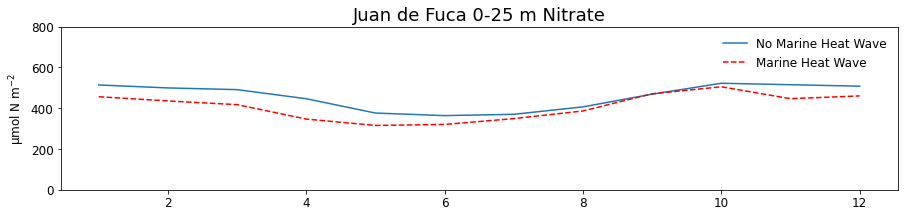

In [35]:
fig, ax = plt.subplots(figsize=(15, 3))
bbox = {'boxstyle': 'round', 'facecolor': 'w', 'alpha': 0.9}
cmap = plt.get_cmap('tab10')
palette = [cmap(0), cmap(0.2), 'k', cmap(0.1), cmap(0.3)]


ax.plot(np.arange(1,13), NoMHW,label='No Marine Heat Wave')
ax.plot(np.arange(1,13), MHW,linestyle='--',label='Marine Heat Wave',color='r')
ax.set_title('Juan de Fuca 0-25 m Nitrate',fontsize=18)
ax.legend(frameon=False)
ax.set_ylim(0,800)
ax.set_ylabel('\u03bcmol N m$^{-2}$')